### This file explores the dataset used for recommendation using visualization

In [2]:
import pandas as pd
import gzip
from PIL import Image
from PIL import ImageOps
import urllib.request as urllib
import urllib.error as err

import io
import numpy as np

def parse(path):
    g = gzip.open(path, 'rb')
    for line in g:
        yield eval(line)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Clothing_Shoes_and_Jewelry_5.json.gz')

In [3]:
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5.0,Great tutu- not cheaply made,1297468800,"02 12, 2011"
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5.0,Very Cute!!,1358553600,"01 19, 2013"
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5.0,I have buy more than one,1357257600,"01 4, 2013"
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5.0,"Adorable, Sturdy",1398556800,"04 27, 2014"
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5.0,Grammy's Angels Love it,1394841600,"03 15, 2014"
5,A27UF1MSF3DB2,0000031887,"C-Lo ""Cynthia""","[0, 0]",I received this today and I'm not a fan of it ...,4.0,It's ok,1396224000,"03 31, 2014"
6,A16GFPNVF4Y816,0000031887,design maven,"[0, 0]",Bought this as a backup to the regular ballet ...,5.0,Great for dress-up and for ballet practice,1399075200,"05 3, 2014"
7,A2M2APVYIB2U6K,0000031887,Jamie P.,"[0, 0]",Great tutu for a great price. It isn't a &#34;...,5.0,Great value,1356220800,"12 23, 2012"
8,A1NJ71X3YPQNQ9,0000031887,JBerger,"[0, 0]","My daughter liked this, and it with her costum...",4.0,Good,1384041600,"11 10, 2013"
9,A3EERSWHAI6SO,0000031887,"Jeffrey Hollingshead ""Jillian hollingshead""","[7, 8]",For what I paid for two tutus is unbeatable an...,5.0,WOW !! ..is all I have to say!,1349568000,"10 7, 2012"


In [5]:
user_item_data = df[['reviewerID','asin','overall','reviewTime','unixReviewTime']]

In [6]:
user_item_data.size

1393385

In [9]:
user_item_data.columns = ["User_Id", "Item_Id", "Rating", "TimeStamp","TimeStamp2"]

In [10]:
user_item_data.head()

,User_Id,Item_Id,Rating,TimeStamp,TimeStamp2
0,A1KLRMWW2FWPL4,0000031887,5.0,"02 12, 2011",1297468800
1,A2G5TCU2WDFZ65,0000031887,5.0,"01 19, 2013",1358553600
2,A1RLQXYNCMWRWN,0000031887,5.0,"01 4, 2013",1357257600
3,A8U3FAMSJVHS5,0000031887,5.0,"04 27, 2014",1398556800
4,A3GEOILWLK86XM,0000031887,5.0,"03 15, 2014",1394841600


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

### Count of each rating

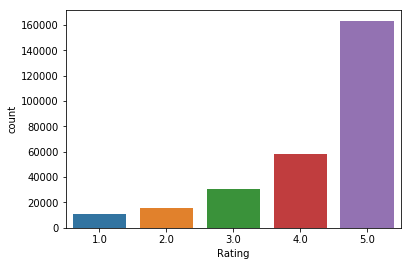

In [12]:
sns.countplot(x='Rating', data=user_item_data)

#### Deduction: Users with positive experience (higher rating) are more likely to leave a review

In [13]:
user_item_data["Year"] = user_item_data.apply(lambda row: row.TimeStamp[-4:], axis=1)

C:\Users\Kiran\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
user_item_data.head()

,User_Id,Item_Id,Rating,TimeStamp,TimeStamp2,Year
0,A1KLRMWW2FWPL4,0000031887,5.0,"02 12, 2011",1297468800,2011
1,A2G5TCU2WDFZ65,0000031887,5.0,"01 19, 2013",1358553600,2013
2,A1RLQXYNCMWRWN,0000031887,5.0,"01 4, 2013",1357257600,2013
3,A8U3FAMSJVHS5,0000031887,5.0,"04 27, 2014",1398556800,2014
4,A3GEOILWLK86XM,0000031887,5.0,"03 15, 2014",1394841600,2014


### Count of ratings in each year

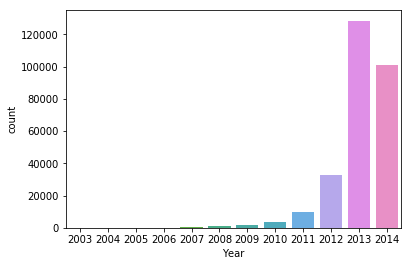

In [15]:
sns.countplot(x='Year', data=user_item_data)

#### Deduction: The number of reviews increased over the years. The data was collected til July 2014 only. This explains the decrease for 2014.

### Count of each rating in each year

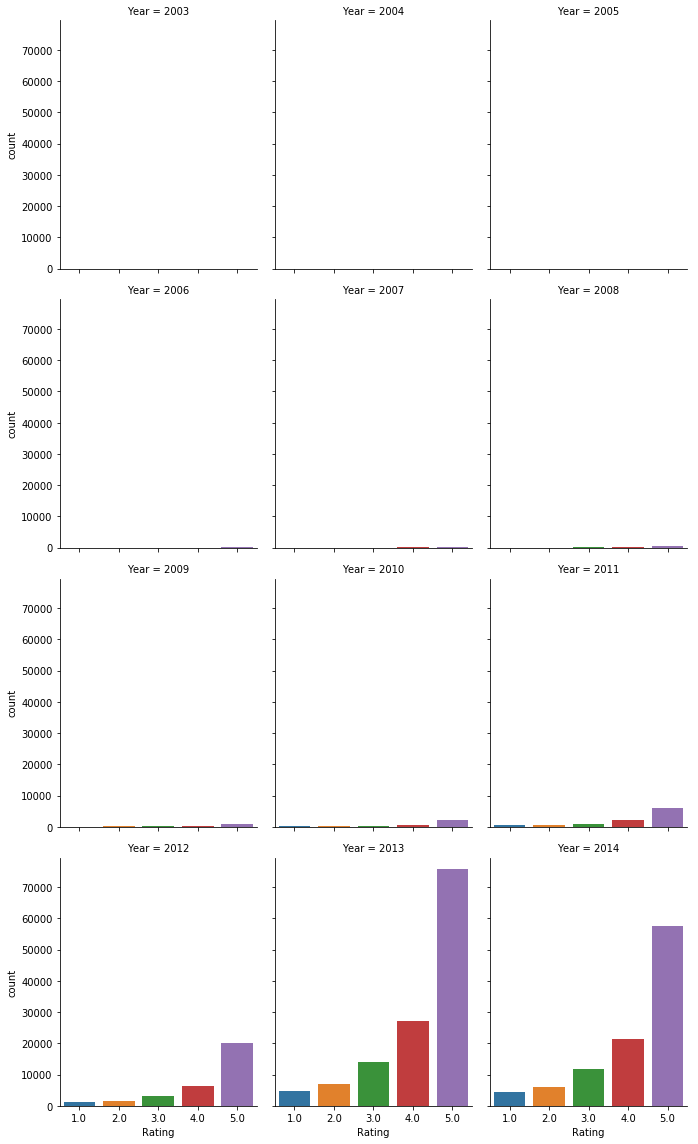

In [33]:
sns.catplot("Rating", col="Year", col_wrap=3, data=user_item_data,kind="count", height=4, aspect=.8)

#### Deduction: Users with positive experience (higher rating) are more likely to leave a review for all years 

### Count of each rating for subset of 10 most frequently rated items

In [44]:
top_10_item = user_item_data.groupby(['Item_Id'])['Rating'].count().reset_index().sort_values(['Rating'], ascending=False) .head(10)
top_10_item

,Item_Id,Rating
12527,B005LERHD8,441
12240,B005GYGD7O,286
17552,B008WYDP1C,249
11497,B0058XIMMM,241
20954,B00CKGB85I,225
15205,B007RD9DS8,217
6282,B002RADHJC,211
2676,B000T9VK56,207
112,B0000C321X,205
252,B0001ZNZJM,197


In [51]:
top10_item = top_10_item["Item_Id"].tolist()
top10_item

['B005LERHD8',
 'B005GYGD7O',
 'B008WYDP1C',
 'B0058XIMMM',
 'B00CKGB85I',
 'B007RD9DS8',
 'B002RADHJC',
 'B000T9VK56',
 'B0000C321X',
 'B0001ZNZJM']

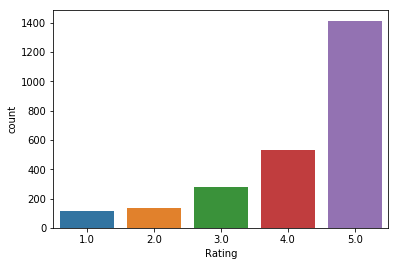

In [56]:
sns.countplot(x='Rating', data=user_item_data.loc[user_item_data["Item_Id"].isin(top10_item)])

#### Deduction: The most frequently rated items follow the same pattern as set of all items. Users are more likely rate an item when they have a positive experience.

### Count of each rating for subset of 10 most frequent users

In [57]:
top_10_user = user_item_data.groupby(['User_Id'])['Rating'].count().reset_index().sort_values(['Rating'], ascending=False) .head(10)
top_10_user

,User_Id,Rating
15966,A2J4XMWKR8PPD0,136
15158,A2GA55P7WGHJCP,76
16313,A2KBV88FL48CFS,69
33263,AENH50GW3OKDA,68
19500,A2V5R832QCSOMX,62
38253,AVUJP7Z6BNT11,61
917,A132ETQPMHQ585,60
15280,A2GP4EJIAA2OE0,59
19359,A2UO040HWOP0C2,59
6144,A1LM4PSE0HJQDW,55


In [58]:
top10_user = top_10_user["User_Id"].tolist()
top10_user

['A2J4XMWKR8PPD0',
 'A2GA55P7WGHJCP',
 'A2KBV88FL48CFS',
 'AENH50GW3OKDA',
 'A2V5R832QCSOMX',
 'AVUJP7Z6BNT11',
 'A132ETQPMHQ585',
 'A2GP4EJIAA2OE0',
 'A2UO040HWOP0C2',
 'A1LM4PSE0HJQDW']

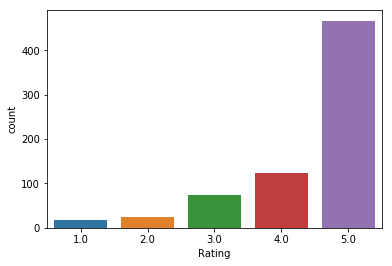

In [60]:
sns.countplot(x='Rating', data=user_item_data.loc[user_item_data["User_Id"].isin(top10_user)])

#### Deduction: The most frequent users subset follow the same pattern as set of all items. Users are more likely rate an item when they have a positive experience.

### Count of ratings for subset of top 10 items with rating 5

In [63]:
top_10_item5 =user_item_data.loc[user_item_data["Rating"] == 5.0].groupby(['Item_Id'])['Rating'].count().reset_index().sort_values(['Rating'], ascending=False) .head(10)
top_10_item5

,Item_Id,Rating
12418,B005LERHD8,259
11400,B0058XIMMM,187
12136,B005GYGD7O,165
17381,B008WYDP1C,150
14917,B007NLX16O,135
2247,B000O32MLI,135
251,B0001ZNZJM,135
757,B0008EOEPK,131
111,B0000C321X,128
16821,B008KK0ZJ8,126


In [64]:
top10_item5 = top_10_item5["Item_Id"].tolist()
top10_item5

['B005LERHD8',
 'B0058XIMMM',
 'B005GYGD7O',
 'B008WYDP1C',
 'B007NLX16O',
 'B000O32MLI',
 'B0001ZNZJM',
 'B0008EOEPK',
 'B0000C321X',
 'B008KK0ZJ8']

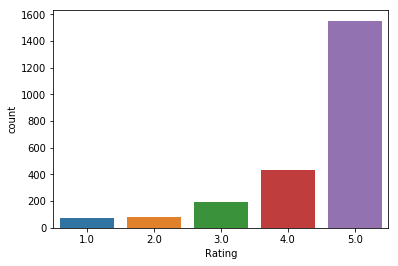

In [65]:
sns.countplot(x='Rating', data=user_item_data.loc[user_item_data["Item_Id"].isin(top10_item5)])

#### Deduction: There is an overlap between items with most ratings and items with most 5 ratings. The pattern still remains the same. Users are more likely to rate items when they have a positive experience. But even the items with maximum positive reviews have bad reviews. 